In [1]:
import matplotlib.pyplot as plt
import numpy as np
from hiv import HIVTreatment
import tensorflow as tf

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 3.]
 [1. 1. 1. 1.]]


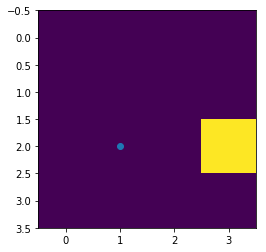

In [4]:
Arr = np.ones([4, 4])
Arr[2 ,3] = 3

print(Arr)

plt.figure()
plt.imshow(Arr)
plt.scatter(1, 2)
plt.show()

### Hidden parameter

In [2]:
hh = HIVTreatment()

In [3]:
perturb_params = ('p_lambda1','p_lambda2','p_k1','p_k2','p_f', \
            'p_m1','p_m2','p_lambdaE','p_bE','p_Kb','p_d_E','p_Kd')
print(perturb_params)

('p_lambda1', 'p_lambda2', 'p_k1', 'p_k2', 'p_f', 'p_m1', 'p_m2', 'p_lambdaE', 'p_bE', 'p_Kb', 'p_d_E', 'p_Kd')


In [4]:
new_dict = {key: value for (key, value) in zip(perturb_params, np.random.normal(size=12))}

In [11]:
for i in range(10):
    hh.reset()
    print(hh.step(0, perturb_params=False))

(array([5.21370912, 0.69856711, 4.07718822, 1.65906929, 4.80563199,
       1.37862914]), 1.752079909325808, 0)
(array([5.21370912, 0.69856711, 4.07718822, 1.65906929, 4.80563199,
       1.37862914]), 1.752079909325808, 0)
(array([5.21370912, 0.69856711, 4.07718822, 1.65906929, 4.80563199,
       1.37862914]), 1.752079909325808, 0)
(array([5.21370912, 0.69856711, 4.07718822, 1.65906929, 4.80563199,
       1.37862914]), 1.752079909325808, 0)
(array([5.21370912, 0.69856711, 4.07718822, 1.65906929, 4.80563199,
       1.37862914]), 1.752079909325808, 0)
(array([5.21370912, 0.69856711, 4.07718822, 1.65906929, 4.80563199,
       1.37862914]), 1.752079909325808, 0)
(array([5.21370912, 0.69856711, 4.07718822, 1.65906929, 4.80563199,
       1.37862914]), 1.752079909325808, 0)
(array([5.21370912, 0.69856711, 4.07718822, 1.65906929, 4.80563199,
       1.37862914]), 1.752079909325808, 0)
(array([5.21370912, 0.69856711, 4.07718822, 1.65906929, 4.80563199,
       1.37862914]), 1.752079909325808, 0)
(

In [12]:
for i in range(10):
    hh.reset()
    print(hh.step(0, perturb_params=True))

(array([5.24626583, 0.9347896 , 3.84900187, 1.68405196, 4.58193409,
       1.44635492]), 2.412940629367211, 0)
(array([5.24197466, 0.91128916, 3.8927032 , 1.6443446 , 4.62443424,
       1.32318117]), 1.6835087079116124, 0)
(array([5.25634816, 0.93127388, 3.93407224, 1.73855814, 4.66499436,
       1.40528917]), 2.0802901154355022, 0)
(array([5.23218544, 0.67535869, 4.05479776, 1.62017143, 4.78305705,
       1.26525579]), 1.235040451542019, 0)
(array([5.24813149, 0.76536876, 3.96710744, 1.68943887, 4.69717633,
       1.25503939]), 1.3010948469905703, 0)
(array([5.15129831, 0.46554086, 4.29946852, 1.68787205, 5.02568068,
       1.41843811]), 1.5599102978860047, 0)
(array([5.23794331, 0.7359974 , 4.02605722, 1.6675239 , 4.75496312,
       1.29376388]), 1.3980120428951774, 0)
(array([5.22968137, 0.8706863 , 3.86014244, 1.64735858, 4.59297052,
       1.35396554]), 1.8675412276453305, 0)
(array([5.18141349, 0.67935443, 4.1632134 , 1.66956516, 4.89090026,
       1.3643187 ]), 1.535904194957270

### HIdden parameter analysis

In [3]:
import pickle
with open('./'+'hiv'+'_preset_hidden_params','r') as f:
    preset_parameters = pickle.load(f)

In [8]:
parr = np.zeros([6, 12])

for i in range(6):
    pp = preset_parameters[i]
    
    for j, key in enumerate(pp):
        parr[i,j] = pp[key]

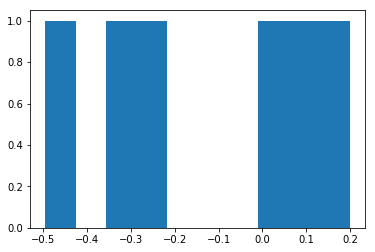

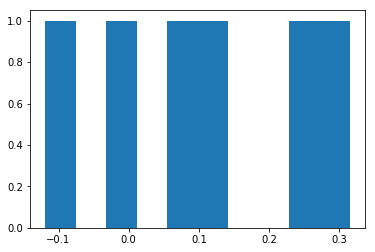

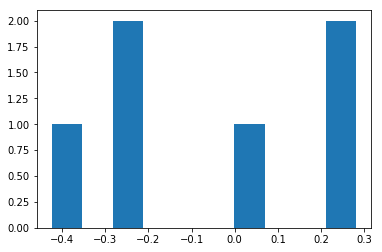

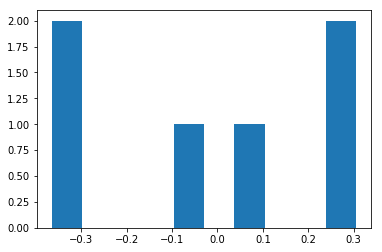

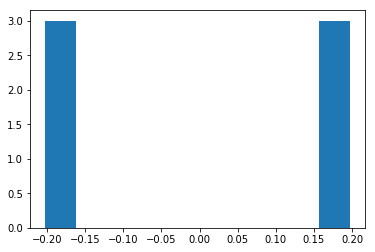

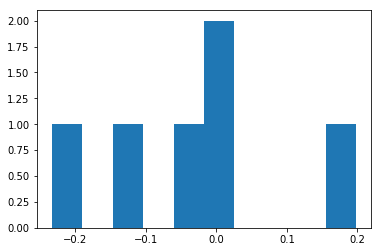

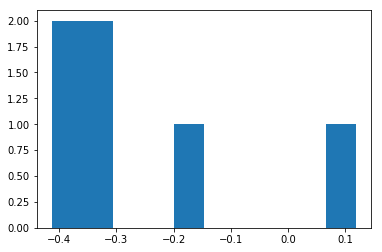

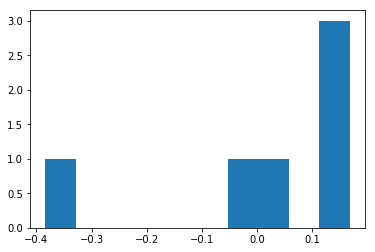

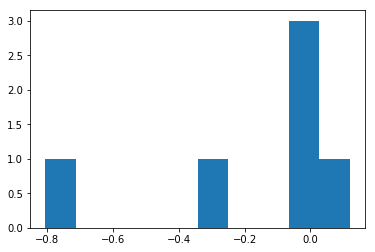

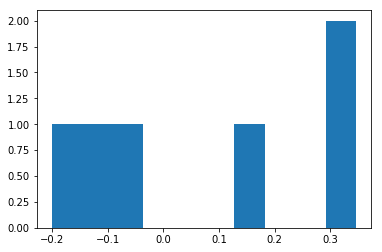

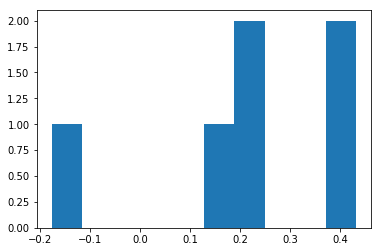

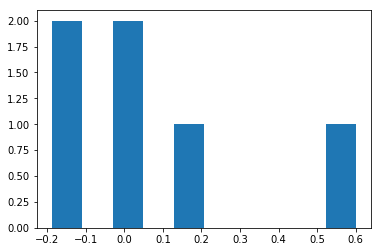

In [9]:
for j in range(12):
    plt.figure()
    plt.hist(parr[:,j])
    plt.show()

### Simple loop over an array

In [173]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.15)

class test_iterate():

        
    def __init__(self):
        self.iter = 0
        self.x = tf.placeholder(shape=[None], dtype=tf.float32)
        self.w = tf.get_variable(initializer=tf.constant(1.), name='wt')
        
        self.transform = tf.scan(self._transform,
                                 elems=(self.x),
                                 initializer=tf.zeros(1.))
        # initializer is required, otherwise the first element is used as initializer
        # and the loop starts 1, ..., N-1 (loosing 1 element!!!)
        
    def _transform(self, xold, xin):
        x = xold+ xin
        return x
        
tf.reset_default_graph()   
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    test_inst = test_iterate()
    sess.run(tf.global_variables_initializer())
    
    xx = 1+np.arange(4)#np.zeros(3)
    
    print(sess.run(test_inst.transform, feed_dict={test_inst.x: xx}))

[ 1.  3.  6. 10.]


### Calculating Gradients

In [ ]:
import numpy as np
import tensorflow as tf

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.15)
#tf.enable_eager_execution()

dim = 10

class test_iterate():

        
    def __init__(self):
        self.iter = 0
        # x
        self.x = tf.placeholder(shape=[None, 1], dtype=tf.float32)
        # weihts
        self.w1 = tf.get_variable(initializer=tf.ones(1), name='w1')
        self.w2 = tf.get_variable(initializer=tf.ones(1), name='w2')
        
        self.phi = tf.einsum('bi,i->b', self.x, self.w1)
        
        self.transform = tf.scan(self._transform,
                                 elems=(self.phi, self.w2),
                                 infer_shape=False)
        
        phi, w = self.transform

        self.w = w[-1]
        
        self.loss = tf.square(tf.zeros(1)- self.w)
        
        # Create an optimizer.
        opt = tf.train.GradientDescentOptimizer(learning_rate=0.1)
        # Compute the gradients for a list of variables.
        self.grads_and_vars = opt.compute_gradients(self.loss)
        # Ask the optimizer to apply the capped gradients.
        self.descent = opt.apply_gradients(self.grads_and_vars)

    # fn(previous_output, current_input):
    def _transform(self, xprev, xin):
        phi, w = xprev
        w *= phi
        return (phi,w)

# -------------------------------------------
tf.reset_default_graph()
        
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    test_inst = test_iterate()
    sess.run(tf.global_variables_initializer())
    
    print(sess.run(test_inst.w2))
    
    xx = 2.*np.ones([dim, 1])
    
    _, out, w, loss = sess.run([test_inst.descent,
                          test_inst.grads_and_vars,
                          test_inst.w,
                        test_inst.loss],
                   feed_dict={test_inst.x: xx})
    
    print('Loss: '+ str(loss))
    print(np.square(512.-0.))
    print(w)
    print(sess.run(test_inst.w2))

### Conditioning

In [31]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.15)

class test_iterate():

    def __init__(self):
        self.iter = tf.constant(0)
        self.x = tf.placeholder(shape=[None], dtype=tf.float32)
        self.y = tf.placeholder(shape=[None, 2], dtype=tf.float32)
        self.w = tf.get_variable(initializer=tf.constant([5.]), name='wt')
        self.Lt = tf.get_variable(initializer=tf.constant([[5., 3.], [5., 3.]]), name='Lt')
        
        _, _, w, L = tf.cond(self.iter > tf.constant(0),
                            lambda:(tf.ones([2, 1]),
                                    tf.ones([1, 2]),
                                    tf.reshape(self.w, [1, 1]),
                                    tf.reshape(self.Lt, [1, 2, 2])),
                            lambda:tf.scan(self._transform,
                                           elems=(self.x,
                                                  self.y, 
                                                  self.w,
                                                  tf.reshape(self.Lt, [1, 2, 2]))))
        
        self.w_back = w[-1]
        self.L_back = L[-1]
        
    def _transform(self, x, xnew):
        (x1,x2,w,L) = x
        x1+=1
        x2+=1
        w+=1
        L+=1
        return (x1,x2,w,L)
        
tf.reset_default_graph()
        
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    test_inst = test_iterate()
    sess.run(tf.global_variables_initializer())
    
    print(sess.run(test_inst.w))
    
    xx = np.arange(10)
    yy = np.zeros([10, 2])
    
    w,L = sess.run([test_inst.w_back, test_inst.L_back],
                   feed_dict={test_inst.x: xx,
                              test_inst.y: yy})
    print(w)
    print(L)
 

[5.]
14.0
[[14. 12.]
 [14. 12.]]


### QNetwork test

In [2]:
import sys
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
tf.random.set_random_seed(1234)
import numpy as np

%load_ext autoreload
%autoreload 1

%aimport QNetwork2


/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
# settings
L_traj = 12
state_space = 6
action_space = 4
noise_precision = 1e-3
split = 5
learning_rate = 1e-4

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.15)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    QNet = QNetwork2.QNetwork(scope='QNetwork')  # neural network
    
    # session
    init = tf.global_variables_initializer()
    sess.run(init)
    
    # generate some training and test data
    # s R⁶, a R⁴
    state = np.zeros([L_traj, state_space])
    action = np.zeros([L_traj])
    reward = np.zeros([L_traj])
    next_state = np.zeros([L_traj, state_space])
    done = np.zeros([L_traj])
    
    sess.run([QNet.reset_post])
    print(sess.run(QNet.wt_bar).reshape(1,-1))
    
    for i in range(2,L_traj):
        state[i] = 3.*np.random.rand(state_space)
        action[i] = np.random.randint(3)
        reward[i] = 2.+np.random.normal()
        next_state[i] = 3.*np.random.rand(state_space)
        done[i] = 0
        
        _, wout = sess.run([QNet.update_posterior, QNet.wout],
            feed_dict={QNet.context_state: state[i-1:i+1].reshape(-1, state_space),
                        QNet.context_action: np.array(action[i-1:i+1]).reshape(-1),
                         QNet.context_reward: np.array(reward[i-1:i+1]).reshape(-1),
                           QNet.context_state_next: next_state[i-1:i+1].reshape(-1, state_space),
                           QNet.context_done: np.array(done[i-1:i+1]).reshape(-1, 1),
                            QNet.nprec: noise_precision, QNet.is_online: True})

        print(wout.reshape(1,-1))
        print(sess.run(QNet.wt_bar).reshape(1,-1))
        
    # learning  
    # select amax from online network
    amax_online = sess.run(QNet.max_action,
        feed_dict={QNet.context_state: state[:split].reshape(-1, state_space),
                   QNet.context_action: action[:split].reshape(-1),
                   QNet.context_reward: reward[:split].reshape(-1),
                   QNet.context_state_next: next_state[:split].reshape(-1, state_space),
                   QNet.context_done: done[:split].reshape(-1,1),
                   QNet.state: state[split:],
                   QNet.state_next: next_state[split:],
                   QNet.nprec: noise_precision})

    # evaluate target model
    phi_max_target = sess.run(QNet.phi_max,
        feed_dict={QNet.context_state: state[:split],
                   QNet.context_action: action[:split],
                   QNet.context_reward: reward[:split],
                   QNet.context_state_next: next_state[:split],
                   QNet.state: state[split:],
                   QNet.state_next: next_state[split:],
                   QNet.amax_online: amax_online})

    # update model
    grads, loss, loss1, loss2, Qdiff = sess.run(
        [QNet.gradients, QNet.loss, QNet.loss1, QNet.loss2, QNet.Qdiff],
        feed_dict={QNet.context_state: state[:split].reshape(-1, state_space),
                   QNet.context_action: action[:split].reshape(-1),
                   QNet.context_reward: reward[:split].reshape(-1),
                   QNet.context_state_next: next_state[:split].reshape(-1, state_space),
                   QNet.context_done: done[:split].reshape(-1,1),
                   QNet.state: state[split:],
                   QNet.action: action[split:],
                   QNet.reward: reward[split:],
                   QNet.state_next: next_state[split:],
                   QNet.done: done[split:],
                   QNet.phi_max_target: phi_max_target,
                   QNet.amax_online: amax_online,
                   QNet.lr_placeholder: learning_rate,
                   QNet.nprec: noise_precision})

    print(loss)
    

INFO:tensorflow:Summary name /grad/hist/QNetwork/latent/fully_connected/weights:0 is illegal; using grad/hist/QNetwork/latent/fully_connected/weights_0 instead.
INFO:tensorflow:Summary name /grad/hist/QNetwork/latent/fully_connected/biases:0 is illegal; using grad/hist/QNetwork/latent/fully_connected/biases_0 instead.
INFO:tensorflow:Summary name /grad/hist/QNetwork/latent/LayerNorm/beta:0 is illegal; using grad/hist/QNetwork/latent/LayerNorm/beta_0 instead.
INFO:tensorflow:Summary name /grad/hist/QNetwork/latent/LayerNorm/gamma:0 is illegal; using grad/hist/QNetwork/latent/LayerNorm/gamma_0 instead.
INFO:tensorflow:Summary name /grad/hist/QNetwork/latent/fully_connected_1/weights:0 is illegal; using grad/hist/QNetwork/latent/fully_connected_1/weights_0 instead.
INFO:tensorflow:Summary name /grad/hist/QNetwork/latent/fully_connected_1/biases:0 is illegal; using grad/hist/QNetwork/latent/fully_connected_1/biases_0 instead.
INFO:tensorflow:Summary name /grad/hist/QNetwork/latent/LayerNor

### Testing iterative updates for GP

In [4]:
import tensorflow as tf
import numpy as np

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [250]:
# my batch udate
class my_batch():
    def __init__(self):
        self.xtf = tf.placeholder(shape=[None, 2], dtype=tf.float32)
        self.ytf = tf.placeholder(shape=[None], dtype=tf.float32)
        self.stf = tf.placeholder(shape=[1], dtype=tf.float32)
        
        self.L0 = tf.constant([[1., 0.23], [0.23, 1.]])
        self.w0_bar = tf.constant(0.5, shape=[2,1])
        bsc, _ = tf.unstack(tf.shape(self.xtf))
        self.Sigma_e_context = self.stf* tf.ones(bsc, name='noise_precision')
    
        self.update_posterior = self._update_posterior(self.xtf, self.ytf)
        
    def _update_posterior(self, phi_hat, reward):
        ''' update posterior distribution '''
        Le = tf.linalg.inv(tf.linalg.diag(self.Sigma_e_context)) # noise precision
        Lt = tf.matmul(tf.transpose(phi_hat), tf.matmul(Le, phi_hat)) + self.L0
        Lt_inv = tf.linalg.inv(Lt) # posterior variance
        wt_unnormalized = tf.matmul(self.L0, self.w0_bar) + \
                        tf.matmul(tf.transpose(phi_hat),
                                  tf.matmul(Le, tf.reshape(reward, [-1, 1])))
        wt_bar = tf.matmul(Lt_inv, wt_unnormalized) # posterior mean

        return wt_bar, Lt_inv

In [251]:
# my online update (with tf.scan -> not working propperly)
# issues arises with not initializing tf.scan thus it uses
# the first element for initialization and "loses" one data pt
class my_online():
    def __init__(self):
        self.xtf = tf.placeholder(shape=[None, 2], dtype=tf.float32)
        self.ytf = tf.placeholder(shape=[None], dtype=tf.float32)
        self.stf = tf.placeholder(shape=[1], dtype=tf.float32)
        
        self.L0 = tf.constant([[1., 0.23], [0.23, 1.]])
        self.w0_bar = tf.constant(0.5, shape=[2,1])
        
        with tf.variable_scope('online', reuse=tf.AUTO_REUSE):
            self.wt_bar = tf.get_variable('wt_bar', initializer=self.w0_bar, trainable=False)
            self.Lt_inv = tf.get_variable('Lt_inv', initializer=tf.linalg.inv(self.L0), trainable=False)
            self.wt_unnorm = tf.get_variable('wt_unnorm', initializer=tf.matmul(self.L0, self.w0_bar), trainable=False)


        _, _, wt_unnorm_online, wt_bar_online, Lt_inv_online = tf.scan(self._update_posterior_online,
                 elems=(self.xtf,
                        self.ytf,
                        tf.reshape(tf.matmul(self.L0, self.w0_bar), [1, 2, 1]),
                        tf.reshape(self.w0_bar, [1, 2, 1]),
                        tf.reshape(tf.linalg.inv(self.L0), [1, 2, 2])))

        self.wt_bar_online = wt_bar_online
        
        w_assign = tf.assign(self.wt_bar, wt_bar_online[-1])
        L_assign = tf.assign(self.Lt_inv, Lt_inv_online[-1])
        w_unnorm = tf.assign(self.wt_unnorm, wt_unnorm_online[-1])

        self.update_posterior = tf.group([w_assign, L_assign, w_unnorm])

        
        
    def _update_posterior_online(self, old_values, update_values):

            (_, _, wt_unnorm_old, wt_bar_old, Lt_inv_old) = old_values
            (phi_taken, reward, _, _, _) = update_values

            # max action
            phi_hat = phi_taken

            # variance
            denum = self.stf + tf.einsum('i,ij,j->', phi_hat, Lt_inv_old, phi_hat)
            denum = tf.reciprocal(denum)

            num = tf.einsum('ij,j->i', Lt_inv_old, phi_hat)
            num = tf.einsum('i,j->ij', num, num)

            Lt_inv = Lt_inv_old - tf.multiply(num, denum)

            # mean
            wt_unnorm = wt_unnorm_old + tf.multiply(1./self.stf* reward, tf.reshape(phi_hat, [-1, 1]))
            wt_bar = tf.matmul(Lt_inv, wt_unnorm)

            return (phi_taken, reward, wt_unnorm, wt_bar, Lt_inv)
        

In [252]:
x = np.array([[0.834, 0.2234], [0.7234, 0.3234], [0.923, 0.256]])
y = np.array([1.34, 1.87, 2.46])
sigma = np.array([0.1])

In [253]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.10)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    mybatch = my_batch()
    sess.run(tf.global_variables_initializer())
    
    w, L = sess.run(mybatch.update_posterior,
                    feed_dict={mybatch.xtf: x,
                               mybatch.ytf: y,
                               mybatch.stf: sigma})
                    
    
    print('Batch: '+ str(w.reshape(1,-1)))

Batch: [[1.9438286 0.8575516]]


In [254]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.10)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    myonline = my_online()
    sess.run(tf.global_variables_initializer())
    
    _, wttt = sess.run([myonline.update_posterior, myonline.wt_bar_online],
                    feed_dict={myonline.xtf: x,
                               myonline.ytf: y,
                               myonline.stf: sigma})
                    
    w, L = sess.run([myonline.wt_bar, myonline.Lt_inv])
    print('Online: '+ str(w.reshape(1,-1)))

Online: [[2.2943645 0.6084471]]


In [255]:
def _update_posterior_online(phi_taken, reward, wt_unnorm_old, wt_bar_old, Lt_inv_old):
            nprec = 10.
        
            # max action
            phi_hat = phi_taken
            
            # variance
            denum = 1./nprec + np.einsum('i,ij,j->', phi_hat, Lt_inv_old, phi_hat)
            denum = np.reciprocal(denum)

            num = np.einsum('ij,j->i', Lt_inv_old, phi_hat)
            num = np.einsum('i,j->ij', num, num)

            Lt_inv = Lt_inv_old - np.multiply(num, denum)

            # mean
            wt_unnorm = wt_unnorm_old + np.multiply(nprec* reward, phi_hat.reshape([-1, 1]))
            
            wt_bar = np.matmul(Lt_inv, wt_unnorm)

            return wt_unnorm, wt_bar, Lt_inv

In [256]:
L0 = np.array([[1., 0.23], [0.23, 1.]])
w0_bar = np.array([[0.5], [0.5]])

wt, wt_unnorm, Lt_inv = w0_bar, np.matmul(L0, w0_bar), np.linalg.inv(L0)

for i in range(len(x)):
    wt_unnorm, wt, Lt_inv = _update_posterior_online(x[i], y[i], wt_unnorm, wt, Lt_inv)

print(wt.reshape(1,-1))

[[1.94382796 0.8575524 ]]


In [257]:
class my_online():
    def __init__(self):
        self.xtf = tf.placeholder(shape=[None, 2], dtype=tf.float32)
        self.ytf = tf.placeholder(shape=[None], dtype=tf.float32)
        self.stf = tf.placeholder(shape=[1], dtype=tf.float32)
        
        self.L0 = tf.constant([[1., 0.23], [0.23, 1.]])
        self.w0_bar = tf.constant(0.5, shape=[2,1])
        
        with tf.variable_scope('online', reuse=tf.AUTO_REUSE):
            self.wt_bar = tf.get_variable('wt_bar', initializer=self.w0_bar, trainable=False)
            self.Lt_inv = tf.get_variable('Lt_inv', initializer=tf.linalg.inv(self.L0), trainable=False)
            self.wt_unnorm = tf.get_variable('wt_unnorm', initializer=tf.matmul(self.L0, self.w0_bar), trainable=False)
        
        wt_bar, Lt_inv = self._update_posterior_online(self.xtf, self.ytf)
        
        w_assign = tf.assign(self.wt_bar, wt_bar)
        L_assign = tf.assign(self.Lt_inv, Lt_inv)

        self.update_posterior = tf.group([w_assign, L_assign])
        self.reset_posterior = self._reset_posterior()
        
    def _update_posterior_online(self, phi_taken, reward):
        # max action
        phi_hat = phi_taken

        # variance
        denum = self.stf + tf.einsum('bi,ij,bj->b', phi_hat, self.Lt_inv, phi_hat)
        denum = tf.reciprocal(denum)

        num = tf.einsum('ij,bj->bi', self.Lt_inv, phi_hat)
        num = tf.einsum('bi,bj->bij', num, num)

        Lt_inv = self.Lt_inv - tf.einsum('b,bij->ij', denum, num)

        # mean
        wt_unnorm = self.wt_unnorm + 1./self.stf * tf.reshape(tf.einsum('bi,b->i', phi_hat, reward), [-1, 1])
        update_op = tf.assign(self.wt_unnorm, wt_unnorm)

        with tf.control_dependencies([update_op]):
            wt_bar = tf.matmul(Lt_inv, wt_unnorm)

        return wt_bar, Lt_inv
    
    def _reset_posterior(self):
        update_op0 = tf.assign(self.wt_bar, self.w0_bar)
        update_op1 = tf.assign(self.Lt_inv, tf.linalg.inv(self.L0))
        update_op2 = tf.assign(self.wt_unnorm, tf.matmul(self.L0, self.w0_bar))

        update_op = tf.group([update_op0, update_op1, update_op2])

        return update_op
    


In [258]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.10)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    myonline = my_online()
    sess.run(tf.global_variables_initializer())
    sess.run(myonline.reset_posterior)
    
    for i in range(len(x)):
        _ = sess.run(myonline.update_posterior,
                        feed_dict={myonline.xtf: x[i].reshape(-1,2),
                                   myonline.ytf: y[i].reshape(-1),
                                   myonline.stf: sigma})
                    
    w, L = sess.run([myonline.wt_bar, myonline.Lt_inv])
    print('Online: '+ str(w.reshape(1,-1)))

Online: [[1.9438286 0.8575516]]


In [ ]:
Batch: [[1.9438286 0.8575516]]